In [1]:
import sys
sys.path.append("/home/salmon/workspace/SpDev/SpCommon")
sys.path.append("/home/salmon/workspace/SpDev/SpDB")

from spdm.util.logger import logger
from spdm.data import connect
import matplotlib.pyplot as plt
import numpy as np
from spdm.data.plugins.PluginXML import open_xml


In [2]:
db = connect("imas://",
                 backend="mdsplus:///home/salmon/public_data/efit_east",  # "mdsplus://202.127.22.24/east_fit",
                 mapping_files=[
                     "/home/salmon/workspace/SpDev/SpDB/mapping/EAST/imas/3/static/config.xml",
                     "/home/salmon/workspace/SpDev/SpDB/mapping/EAST/imas/3/dynamic/config.xml"
                 ])
entry = db.open(shot=55555).entry



2020-10-14 18:06:12,216 INFO [spdm] /home/salmon/workspace/SpDev/SpDB/spdm/data/connect.py:22:connect: Load SpDB.Plugin: IMAS
2020-10-14 18:06:12,221 DEBUG [spdm] /home/salmon/workspace/SpDev/SpDB/spdm/data/plugins/PluginXML.py:126:load_xml: Loading XML file from /home/salmon/workspace/SpDev/SpDB/mapping/EAST/imas/3/static/config.xml
2020-10-14 18:06:12,224 DEBUG [spdm] /home/salmon/workspace/SpDev/SpDB/spdm/data/plugins/PluginXML.py:126:load_xml: Loading XML file from /home/salmon/workspace/SpDev/SpDB/mapping/EAST/imas/3/static/magnetics.xml
2020-10-14 18:06:12,226 DEBUG [spdm] /home/salmon/workspace/SpDev/SpDB/spdm/data/plugins/PluginXML.py:126:load_xml: Loading XML file from /home/salmon/workspace/SpDev/SpDB/mapping/EAST/imas/3/static/wall.xml
2020-10-14 18:06:12,229 DEBUG [spdm] /home/salmon/workspace/SpDev/SpDB/spdm/data/plugins/PluginXML.py:126:load_xml: Loading XML file from /home/salmon/workspace/SpDev/SpDB/mapping/EAST/imas/3/static/pf_active.xml
2020-10-14 18:06:12,230 DEBUG 

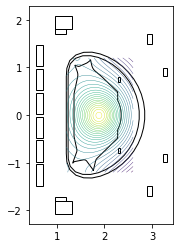

In [3]:
# doc = open_xml(["/home/salmon/workspace/SpDev/SpDB/mapping/EAST/imas/3/static"])
# entry = doc.entry

fg=plt.figure()


for coil in entry.pf_active.coil:
    rect=coil.element[0].geometry.rectangle.__value__()
    plt.gca().add_patch(plt.Rectangle((rect.r-rect.width/2.0,rect.z-rect.height/2.0),rect.width,rect.height,fill=False))

plt.gca().add_patch(plt.Polygon(np.array([entry.wall.description_2d.vessel.annular.outline_outer.r.__value__(),    
                                          entry.wall.description_2d.vessel.annular.outline_outer.z.__value__()]).transpose([1,0]),
                                fill=False,closed=True))

plt.gca().add_patch(plt.Polygon(np.array([entry.wall.description_2d.vessel.annular.outline_inner.r.__value__(),    
                                          entry.wall.description_2d.vessel.annular.outline_inner.z.__value__()]).transpose([1,0]),
                                fill=False,closed=True))

plt.gca().add_patch(plt.Polygon(np.array([entry.wall.description_2d[0].limiter.unit[0].outline.r.__value__(),
                                          entry.wall.description_2d[0].limiter.unit[0].outline.z.__value__()]).transpose([1,0]),
                                fill=False,closed=True))

plt.contour(
    entry.equilibrium.time_slice[1].profiles_2d.grid.dim1.__value__(),
    entry.equilibrium.time_slice[1].profiles_2d.grid.dim2.__value__(),
    entry.equilibrium.time_slice[1].profiles_2d.psi.__value__(),
    levels =30,linewidths=0.4
    )
plt.axis('scaled')
plt.show()

In [4]:
entry.equilibrium.time_slice[1].profiles_2d.psi.__value__()

array([[0.60384983, 0.60429828, 0.60472669, ..., 0.55413499, 0.55362557,
        0.55311884],
       [0.60377344, 0.60418777, 0.60458486, ..., 0.55524315, 0.55472138,
        0.55420182],
       [0.60375593, 0.60413885, 0.604507  , ..., 0.55633775, 0.55580421,
        0.55527244],
       ...,
       [0.60571219, 0.60611383, 0.60650014, ..., 0.56388172, 0.5634375 ,
        0.56299429],
       [0.60571627, 0.60615122, 0.60656827, ..., 0.56305688, 0.56263299,
        0.56221079],
       [0.60578157, 0.60625252, 0.60670266, ..., 0.56222082, 0.56181826,
        0.56141816]])